In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42
recalc_meds = False #recalculate the groupwise median stats set to False to load from file

Populating the interactive namespace from numpy and matplotlib


In [31]:
import h5py
epoch_db = h5py.File('../imaging_post_processing/epoch_db_nnls_fits_bk_sub_F.hdf5','a')

In [32]:
epoch_db.keys()

[u'exp_names',
 u'flt_samples',
 u'fly_numbers',
 u'genotypes',
 u'signal_data',
 u'signal_names',
 u'swarm_names',
 u'trial_names',
 u'trial_numbers',
 u'trial_times']

In [ ]:
for gt in epoch_db['genotypes']:

In [38]:
genotype_mask = np.array(epoch_db['genotypes']) == gd.genotype_nicknames['GMR40D04']

In [41]:
set(np.array(epoch_db['trial_names']))

{'ascending',
 'descending',
 'flight_starts',
 'flight_stops',
 'progressive',
 'pth_roll_0',
 'pth_roll_120',
 'pth_roll_150',
 'pth_roll_180',
 'pth_roll_210',
 'pth_roll_240',
 'pth_roll_270',
 'pth_roll_30',
 'pth_roll_300',
 'pth_roll_330',
 'pth_roll_60',
 'pth_roll_90',
 'pth_roll_multipole',
 'pth_roll_phsrndm',
 'regressive',
 'stripe_fix',
 'yaw_left',
 'yaw_right'}

In [42]:
ptch_names = ['pth_roll_0',
 'pth_roll_120',
 'pth_roll_150',
 'pth_roll_180',
 'pth_roll_210',
 'pth_roll_240',
 'pth_roll_270',
 'pth_roll_30',
 'pth_roll_300',
 'pth_roll_330',
 'pth_roll_60',
 'pth_roll_90']

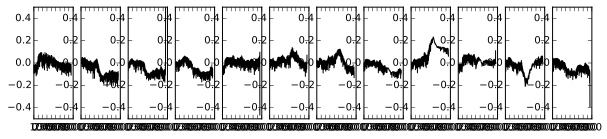

In [79]:
figure(figsize = (10,2))
subplot(len(ptch_names),1,1)
for i,nm in enumerate(ptch_names):
    subplot(1,len(ptch_names),i+1)
    trial_mask =  np.array(epoch_db['trial_names']) == nm
    trial_mask *= genotype_mask
    trial_mask *=np.array(epoch_db['signal_names']) == 'hg4'
    sweep = np.nanmean(epoch_db['signal_data'][trial_mask,:],axis = 0)
    sweep -= np.mean(sweep[0:200])
    plot(sweep,color = 'k', )
    gca().set_ybound(-0.5,0.5)
    

In [52]:
shape(epoch_db['signal_data'])

(293803, 1150)

In [22]:
!ls /media/FlyDataC/FlyDB/Fly0587

basis_fits.cpkl  fly_record.hdf5  nnls_fits_bk_sub_F.cpkl	    Note.txt
epoch_data.cpkl  genotype.txt	  nnls_fits_bk_sub_F_sig_mtrx.cpkl


In [27]:
!less /media/FlyDataC/FlyDB/Fly0588/genotype.txt

+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR40D04-GAL4}attP2/+
(END)